### **WORKING WITH CAPTCHA:**
#### **Topics**
- Introduction to working with Captchas
- Handling Captchas
- Mini Project - Working with Captchas
- Best Practices when dealing with Captchas

#### **1. Intro**
- **CAPTCHAs** (`Completely Automated Public Turing tests to tell Computers and Humans Apart`) are designed to prevent automated scripts from accessing websites
- While bypassing them raises legal and ethical concerns, it's important to know how to handle them responsibly in web scraping.

#### **2. Understanding Captcha**
##### **1. What is a CAPTCHA?**
 - A security mechanism to differentiate bots from humans
 - **Examples:** Text-based, Image-based (reCAPTCHA), Checkbox-based, Audio CAPTCHA, and Captcha
  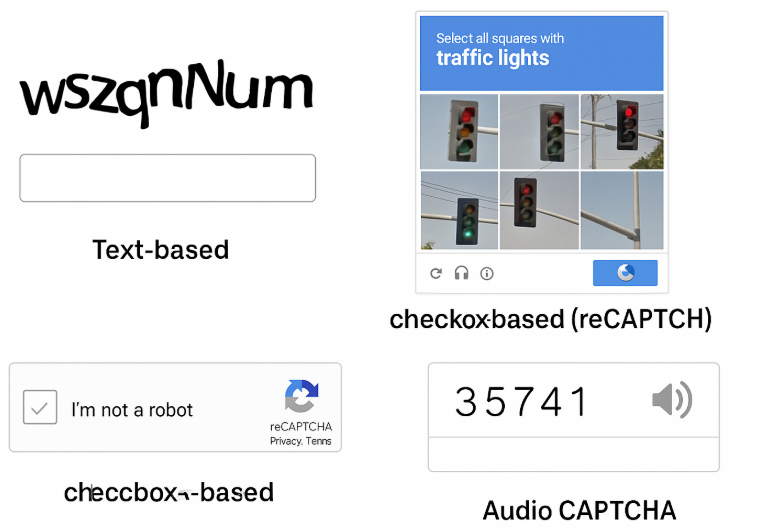

##### **2. Why do websites use CAPTCHAs?**
 - Prevent spam, bot scraping, and DDoS attacks
 - Protect sensitive user data
 - Filter out non-human interactions for better data quality (Data Collection)

##### **3. Identification Steps for CAPTCHA (like reCAPTCHA)**

**3.1. Inspect Network Requests (`F12 ‚Üí Network` Tab)**
- Open Developer Tools using `F12` or `Ctrl+Shift+I`.
- Navigate to the **Network** tab.
- Reload the page and look for JavaScript requests to the following domains:
  - `www.gstatic.com/recaptcha/`
  - `www.google.com/recaptcha/`
  - `recaptcha.net/recaptcha/`
- These indicate the presence of **Google reCAPTCHA**.

**3.2. Check Response Status Codes**
- Look for HTTP responses that suggest blocking or throttling:
  - `403 Forbidden` ‚Üí Your IP or user-agent may be blocked.
  - `429 Too Many Requests` ‚Üí You're being rate-limited or a CAPTCHA is triggered.
- These usually appear after sending multiple automated requests.

**3.3. Simulate Multiple Requests**
- Send repeated requests in a short time span to test for rate-limiting behavior.
- Watch for changes such as:
  - Form not submitting properly
  - Hidden reCAPTCHA widget appearing
  - Additional JavaScript files loading dynamically

**3.4. Check HTML Content**
- Inspect the page's source code (`Ctrl+U`) or go to the **Elements** tab in DevTools.
- Look for the following patterns:
```html
<div class="g-recaptcha" data-sitekey="..."></div>


#### **‚öñÔ∏è Ethical & Legal Considerations**  

**‚úÖ Ethical Considerations**
- Always check the website's `robots.txt` file.
- Do not overload a server with excessive or frequent requests.
- Scraping should be done for **legitimate and ethical** purposes only.

**‚ö†Ô∏è Legal Risks**
- **Violating Terms of Service** could expose you to legal consequences.
- **Unauthorized CAPTCHA bypassing** may be considered hacking under the **CFAA (Computer Fraud and Abuse Act)**.
- **Using third-party CAPTCHA-solving services** may violate the website‚Äôs policies and terms of use.


### **Prevent Triggering CAPTCHA**
To avoid triggering CAPTCHA challenges while scraping or automating websites:
#### **Slow Down Your Requests**
- Mimic human-like interaction:
```python
import time, random
time.sleep(random.uniform(2, 5))  # Random delay between 2 to 5 seconds
``` 

#### **Rotate User to Mimic Real Browsers:**
- Websites detect scrapers by checking the User-Agent header
- Use a pool of real browser User-Agent strings and rotate them
- Use different browser signatures to simulate various devices:
```python
headers = {
    "User-Agent": random.choice([
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64)...",
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7)...",
        "Mozilla/5.0 (X11; Linux x86_64)..."
    ])
}
```
- Tools like `fake_useragent` can help automate this.

#### **Use Proxies and VPNs**
- Rotate IP addresses to avoid rate limits:
    - Residential proxies
    - Free or paid proxy lists
    - VPN rotation (not always reliable for scraping)


#### **Rotate Cookies and Sessions**
- Maintain session persistence and rotate cookies across requests.
- **Session Example:**
```python
driver.delete_all_cookies()
# Load a new set of cookies if needed
```
- **Requests Session Example:**
```python
import requests
session = requests.Session()
session.cookies.update({"cookie_name": "cookie_value"})
```

#### **Mimic Human Behavior with Headless Browsers**
- Use Selenium to simulate real user actions.
- Randomize mouse movements, clicks, and scrolling to look human-like.
- Avoid direct requests‚Äîinteract like a real user, even in headless mode.
```python
from selenium import webdriver
import time, random

driver = webdriver.Chrome()
driver.get("https://example.com")

# Random scroll
scroll_distance = random.randint(50, 200)
driver.execute_script(f"window.scrollBy(0, {scroll_distance})")

# Random delay
time.sleep(random.uniform(1, 3))  # Delay between 1 to 3 seconds

# Continue with further actions...
```

### **Handling CAPTCHAs the Right Way**

#### **1. Manually Solve CAPTCHAs When Necessary**
- For infrequent scraping tasks, it's often best to **pause execution** and solve **CAPTCHAs** manually.
- In Python, you can use the `input()` function to pause:
```python
    input("Please solve the CAPTCHA and press Enter to continue...")
```
- Once you've solved the CAPTCHA in the browser or automation window, press Enter to resume execution.

#### **2. Use Browser Automation to Bypass Some CAPTCHAs**
- Tools like **Selenium** paired with undetected-chromedriver can help mimic human-like browsing and **avoid detection.**
- This approach works well for less aggressive **CAPTCHA** implementations.
  ```python
    import undetected_chromedriver as uc

    options = uc.ChromeOptions()
    driver = uc.Chrome(options=options)
    driver.get("https://example.com")
  ```

#### **3. Use CAPTCHA-Solving Services for Complex Scenarios**
- For frequent or large-scale scraping, consider **CAPTCHA solving services** that leverage AI or human workers:
    - **2Captcha**
    - **Anti-Captcha**
- These services typically provide APIs that integrate with your script to **automatically solve CAPTCHAs**.


### **Real-world Scraping Strategies**

| **Situation**                           | **Recommended Approach**                    |
| --------------------------------------- | ------------------------------------------- |
| Simple website with no CAPTCHA          | Direct requests with `requests` library     |
| CAPTCHA appears after multiple requests | Slow down, rotate IPs and User-Agents       |
| Image/text CAPTCHA                      | Use OCR (e.g., Tesseract) or manual solving |
| Google reCAPTCHA v2                     | Use a solving service (e.g., 2Captcha)      |
| Website bans IPs quickly                | Use rotating proxies or VPNs                |
| Website provides an API                 | Use the official API instead of scraping    |


### **Solving CAPTCHA (Theory)**
Handling **CAPTCHA** is one of the most complex parts of automation. Below are tools and techniques used to detect, bypass, or solve different types of CAPTCHAs.

#### **üîÅ Step-by-Step Workflow**

1. Use **Selenium** to open the CAPTCHA-protected page.
2. Pause execution and attempt solving strategies below.
3. Apply appropriate CAPTCHA-solving logic based on CAPTCHA type.


#### **üïµÔ∏è Tools & Libraries**

**Basic Evasion Tools**
- **`fake_useragent`** ‚Äì Randomize User-Agent to reduce bot detection.
- **`undetected-chromedriver`** ‚Äì Modified ChromeDriver to evade bot filters.

#### **üî§ Text-based CAPTCHA Solving**
**‚úÖ OCR (Optical Character Recognition):**
- **`pytesseract`**
  - Python wrapper for Google‚Äôs Tesseract OCR engine.
  - Works best with clean, high-contrast text-based CAPTCHA images.

- **`EasyOCR`**
  - Lightweight, supports multiple languages.
  - Better for stylized or distorted fonts.

**üßä Image & Slider CAPTCHA Solving:**
- **`OpenCV`**
  - Detect image patterns.
  - Useful for slider-based CAPTCHAs (e.g., puzzle pieces).
  - Can be combined with image matching for CAPTCHA overlays.

**üó£Ô∏è Audio reCAPTCHA Solving:**

Google's **reCAPTCHA v2** may offer an audio challenge:
- **`SpeechRecognition`**
  - Converts audio CAPTCHA to text using speech-to-text engines.
- **`pydub`**
  - Handles audio processing, format conversion, etc.

> ‚ö†Ô∏è Audio CAPTCHA solving is slow and unreliable. Not recommended for production use unless absolutely necessary.

**üíµ Paid CAPTCHA Solvers (API-Based):**

These services use human solvers or AI to solve CAPTCHAs within seconds. Many offer **free-tier or trial credits**:

| Service           | Notes                                 |
|------------------|----------------------------------------|
| **2Captcha**      | Solves reCAPTCHA, hCAPTCHA, image CAPTCHAs |
| **AntiCaptcha**   | Fast, supports all major CAPTCHA types |
| **CapSolver**     | Competitive pricing, AI-based          |
| **DeathByCaptcha**| Long-standing provider                 |

**‚öñÔ∏è Ethical and Legal Reminder**

> **Always use CAPTCHA solving techniques only on websites where automation is permitted.**
>
> Breaking CAPTCHA protections can violate Terms of Service or legal boundaries.




### **üß† Solving CAPTCHA (Practical)**
#### **1. Using the `input()` function**
- Manually input the **CAPTCHA** when prompted during automation:
```python
captcha = input("Enter CAPTCHA value: ")
```
#### **2. Using pytesseract, OpenCV, PIL and NumPy**  
- Install tesseract-ocr using the link: **`https://github.com/UB-Mannheim/tesseract/wiki`**  
- Add the directory of the `tesseract.exe` file to your systems Path environment variable. 
- Install `pytesseract`, `opencv` libraries
    - **cmd command:** pip install pytesseract opencv-python Pillow numpy
- Capture screenshot of webpage  
- Crop the image using **PIL** 
- Preprocess the cropped image using **OpenCV**  
- Extract text from pre-processed image using **pytesseract**  
- Continue interaction using **Selenium**

**Practice url:**  https://www.hackthissite.org/user/login 

### **Handling CAPTCHA using `input()` function**

In [11]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import (
    TimeoutException,
    NoSuchElementException,
    WebDriverException,
)
import os
import time 

# Ensure 'db' directory exists for error screenshots
os.makedirs("db", exist_ok=True)

# Function to Start the Browser
def start_browser(edge_driver_path):
    try:
        print("Edge browser Started...")
        service = Service(edge_driver_path)
        driver = webdriver.Edge(service=service)
        driver.maximize_window()
        return driver
    except WebDriverException as e:
        print(f"Failed to start the browser: {e}")
        return None

class LoginPage:
    def __init__(self, driver):
        self.driver = driver
        self.wait = WebDriverWait(driver, 10)
        self.username = (By.ID, "login_username")
        self.password = (By.ID, "login_password")
        self.login_button = (By.XPATH, "/html/body/table/tbody/tr[2]/td/table/tbody/tr/td[2]/form/table/tbody/tr[4]/td/input")
        self.captcha_img = (By.XPATH, "/html/body/table/tbody/tr[2]/td/table/tbody/tr/td[2]/form/table/tbody/tr[5]/td/img")
    
    def login(self, username, password):
        try:
            print("Filling login form...")
            self.wait.until(EC.presence_of_element_located(self.username)).send_keys(username)
            self.wait.until(EC.presence_of_element_located(self.password)).send_keys(password)
            self.wait.until(EC.element_to_be_clickable(self.login_button)).click()

            try:
                # Try locating the CAPTCHA element 
                captcha_element = self.wait.until(EC.presence_of_element_located(self.captcha_img))
                if captcha_element.is_displayed():
                    print('CAPTCHA image is visible')
                    captcha = input("Enter CAPTCHA :").strip()
                else:
                    print('CAPTCHA not visible')
            except TimeoutException:
                print("CAPTCHA not loaded or not visible.")
            
            print("Login submitted!")
        except TimeoutException as e:
            print("Timeout! Element did not appear.")
            self.driver.save_screenshot("db/timeout_error.png")
        except NoSuchElementException as e:
            print("Element still not found even after wait.")
            self.driver.save_screenshot("db/nosuch_element_error.png")
        except Exception as e:
            print(f"Unexpected login error: {e}")
            self.driver.save_screenshot("db/unexpected_error.png")


# Script Configuration 
EDGE_DRIVER_PATH = r"D:\WEB SCRAPING\S7.Selenium\edgedriver_win64\msedgedriver.exe"
USERNAME = "Nobita"
PASSWORD = "9211@hfhf"
LOGIN_URL = "https://www.hackthissite.org/user/login"

# Execution
driver = None
try:
    driver = start_browser(EDGE_DRIVER_PATH)
    if driver is None:
        raise RuntimeError("Browser failed to start.")

    driver.get(LOGIN_URL)
    print("Login page loaded.")

    login_page = LoginPage(driver)
    login_page.login(USERNAME, PASSWORD)

except Exception as e:
    print(f"Script error: {e}")
    self.driver.save_screenshot("db/script_error.png")

finally:
    if driver:
        time.sleep(5)  
        driver.quit()
        print("Browser closed.")

Edge browser Started...
Login page loaded.
Filling login form...
CAPTCHA image is visible


Enter CAPTCHA : fgfg


Login submitted!
Browser closed.


### **Using pytesseract, OpenCV, PIL and NumPy**


In [8]:
import cv2
import pytesseract
from PIL import Image
import numpy as np
import os
import time

from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import (
    TimeoutException,
    NoSuchElementException,
    WebDriverException,
)

# Tesseract path
pytesseract.pytesseract.tesseract_cmd = r'D:\WEB SCRAPING\S8.Working with Captcha\Tesseract-OCR\tesseract.exe'

# Create 'db' directory
os.makedirs("db", exist_ok=True)

# Browser setup
def start_browser(edge_driver_path):
    try:
        print("Edge browser Started...")
        service = Service(edge_driver_path)
        driver = webdriver.Edge(service=service)
        driver.maximize_window()
        return driver
    except WebDriverException as e:
        print(f"Failed to start the browser: {e}")
        return None

# Script constants
EDGE_DRIVER_PATH = r"D:\WEB SCRAPING\S7.Selenium\edgedriver_win64\msedgedriver.exe"
USERNAME = "Nobita"
PASSWORD = "9211@hfhf"
LOGIN_URL = "https://www.hackthissite.org/user/login"

# Start browser and navigate
driver = None
try:
    driver = start_browser(EDGE_DRIVER_PATH)
    if driver is None:
        raise RuntimeError("Browser failed to start.")

    driver.get(LOGIN_URL)
    print("Login page loaded.")

    wait = WebDriverWait(driver, 10)

    # Fill login credentials
    username_input = wait.until(EC.presence_of_element_located((By.ID, "login_username")))
    password_input = wait.until(EC.presence_of_element_located((By.ID, "login_password")))
    login_button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/table/tbody/tr[2]/td/table/tbody/tr/td[2]/form/table/tbody/tr[4]/td/input")))

    username_input.send_keys(USERNAME)
    password_input.send_keys(PASSWORD)
    login_button.click()

    # Wait and process CAPTCHA
    try:
        captcha_element = wait.until(EC.presence_of_element_located((By.XPATH, "/html/body/table/tbody/tr[2]/td/table/tbody/tr/td[2]/form/table/tbody/tr[5]/td/img")))
        if captcha_element.is_displayed():
            captcha_element.screenshot("db/captcha.png")
            print("‚úÖ CAPTCHA image saved!")

            img = cv2.imread("db/captcha.png")
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            kernel = np.ones((2, 2), np.uint8)
            cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
            dilated = cv2.dilate(cleaned, kernel, iterations=1)
            processed = 255 - dilated
            processed = cv2.resize(processed, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
            cv2.imwrite("db/processed_captcha.png", processed)

            custom_config = r'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789'
            captcha_text = pytesseract.image_to_string(processed, config=custom_config).strip()
            print("üîé Detected CAPTCHA Text:", captcha_text)

            if captcha_text:
                print("Refilling all fields before final login...")

                # Re-locate input fields in case DOM has changed
                username_input = wait.until(EC.presence_of_element_located((By.ID, "login_username")))
                password_input = wait.until(EC.presence_of_element_located((By.ID, "login_password")))
                captcha_input = wait.until(EC.presence_of_element_located((By.ID, "login_captcha")))

                # Clear all fields
                username_input.clear()
                password_input.clear()
                captcha_input.clear()
                time.sleep(1)

                # Refill all fields
                username_input.send_keys(USERNAME)
                time.sleep(1)
                password_input.send_keys(PASSWORD)
                time.sleep(1)
                captcha_input.send_keys(captcha_text)
                time.sleep(1)

                # Re-submit the form
                login_button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/table/tbody/tr[2]/td/table/tbody/tr/td[2]/form/table/tbody/tr[4]/td/input")))
                login_button.click()
            else:
                print("‚ùå CAPTCHA text not detected properly or empty.")
    except TimeoutException:
        print("CAPTCHA not loaded or not visible.")
    except Exception as e:
        print(f"CAPTCHA processing error: {e}")
        driver.save_screenshot("db/captcha_error.png")

    print("Login process finished.")

except Exception as e:
    print(f"Script error: {e}")
    if driver:
        driver.save_screenshot("db/script_error.png")

finally:
    if driver:
        time.sleep(5)
        driver.quit()
        print("Browser closed.")


Edge browser Started...
Login page loaded.
‚úÖ CAPTCHA image saved!
üîé Detected CAPTCHA Text: aaeD
Refilling all fields before final login...
Login process finished.
Browser closed.


#### **Adding waits**

In [10]:
import cv2
import pytesseract
from PIL import Image
import numpy as np
import os

from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, WebDriverException

# Tesseract path
pytesseract.pytesseract.tesseract_cmd = r'D:\WEB SCRAPING\S8.Working with Captcha\Tesseract-OCR\tesseract.exe'

# Create 'db' directory
os.makedirs("db", exist_ok=True)

# Browser setup
def start_browser(edge_driver_path):
    try:
        print("Edge browser Started...")
        service = Service(edge_driver_path)
        driver = webdriver.Edge(service=service)
        driver.maximize_window()
        return driver
    except WebDriverException as e:
        print(f"Failed to start the browser: {e}")
        return None

# Constants
EDGE_DRIVER_PATH = r"D:\WEB SCRAPING\S7.Selenium\edgedriver_win64\msedgedriver.exe"
USERNAME = "Nobita"
PASSWORD = "9211@hfhf"
LOGIN_URL = "https://www.hackthissite.org/user/login"

driver = None
try:
    driver = start_browser(EDGE_DRIVER_PATH)
    if driver is None:
        raise RuntimeError("Browser failed to start.")

    driver.get(LOGIN_URL)
    print("Login page loaded.")

    wait = WebDriverWait(driver, 10)

    # Locate and fill initial credentials
    username_input = wait.until(EC.presence_of_element_located((By.ID, "login_username")))
    password_input = wait.until(EC.presence_of_element_located((By.ID, "login_password")))
    login_button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/table/tbody/tr[2]/td/table/tbody/tr/td[2]/form/table/tbody/tr[4]/td/input")))

    username_input.send_keys(USERNAME)
    password_input.send_keys(PASSWORD)
    login_button.click()

    # Wait and process CAPTCHA
    try:
        captcha_element = wait.until(EC.presence_of_element_located((By.XPATH, "/html/body/table/tbody/tr[2]/td/table/tbody/tr/td[2]/form/table/tbody/tr[5]/td/img")))
        if captcha_element.is_displayed():
            captcha_element.screenshot("db/captcha.png")
            print("‚úÖ CAPTCHA image saved!")

            img = cv2.imread("db/captcha.png")
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            kernel = np.ones((2, 2), np.uint8)
            cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
            dilated = cv2.dilate(cleaned, kernel, iterations=1)
            processed = 255 - dilated
            processed = cv2.resize(processed, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
            cv2.imwrite("db/processed_captcha.png", processed)

            custom_config = r'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789'
            captcha_text = pytesseract.image_to_string(processed, config=custom_config).strip()
            print("üîé Detected CAPTCHA Text:", captcha_text)

            if captcha_text:
                print("Refilling all fields before final login...")

                # Re-locate input fields in case of refresh/DOM changes
                username_input = wait.until(EC.presence_of_element_located((By.ID, "login_username")))
                password_input = wait.until(EC.presence_of_element_located((By.ID, "login_password")))
                captcha_input = wait.until(EC.presence_of_element_located((By.ID, "login_captcha")))

                # Clear all fields
                username_input.clear()
                password_input.clear()
                captcha_input.clear()

                # Refill
                wait.until(EC.element_to_be_clickable((By.ID, "login_username"))).send_keys(USERNAME)
                wait.until(EC.element_to_be_clickable((By.ID, "login_password"))).send_keys(PASSWORD)
                wait.until(EC.element_to_be_clickable((By.ID, "login_captcha"))).send_keys(captcha_text)

                # Click login again
                login_button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/table/tbody/tr[2]/td/table/tbody/tr/td[2]/form/table/tbody/tr[4]/td/input")))
                login_button.click()
            else:
                print("‚ùå CAPTCHA text not detected properly or empty.")
    except TimeoutException:
        print("CAPTCHA not loaded or not visible.")
    except Exception as e:
        print(f"CAPTCHA processing error: {e}")
        driver.save_screenshot("db/captcha_error.png")

    print("Login process finished.")

except Exception as e:
    print(f"Script error: {e}")
    if driver:
        driver.save_screenshot("db/script_error.png")

finally:
    if driver:
        driver.quit()
        print("Browser closed.")


Edge browser Started...
Login page loaded.
‚úÖ CAPTCHA image saved!
üîé Detected CAPTCHA Text: aShsCa
Refilling all fields before final login...
Login process finished.
Browser closed.


#### **Login conditions**

In [12]:
import cv2
import pytesseract
from PIL import Image
import numpy as np
import os

from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, WebDriverException, NoSuchElementException

# Tesseract path
pytesseract.pytesseract.tesseract_cmd = r'D:\WEB SCRAPING\S8.Working with Captcha\Tesseract-OCR\tesseract.exe'

# Create 'db' directory
os.makedirs("db", exist_ok=True)

# Browser setup
def start_browser(edge_driver_path):
    try:
        print("Edge browser Started...")
        service = Service(edge_driver_path)
        driver = webdriver.Edge(service=service)
        driver.maximize_window()
        return driver
    except WebDriverException as e:
        print(f"Failed to start the browser: {e}")
        return None

# Constants
EDGE_DRIVER_PATH = r"D:\WEB SCRAPING\S7.Selenium\edgedriver_win64\msedgedriver.exe"
USERNAME = "Nobita"
PASSWORD = "9211@hfhf"
LOGIN_URL = "https://www.hackthissite.org/user/login"

driver = None
try:
    driver = start_browser(EDGE_DRIVER_PATH)
    if driver is None:
        raise RuntimeError("Browser failed to start.")

    driver.get(LOGIN_URL)
    print("Login page loaded.")

    wait = WebDriverWait(driver, 10)

    # Locate and fill initial credentials
    username_input = wait.until(EC.presence_of_element_located((By.ID, "login_username")))
    password_input = wait.until(EC.presence_of_element_located((By.ID, "login_password")))
    login_button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/table/tbody/tr[2]/td/table/tbody/tr/td[2]/form/table/tbody/tr[4]/td/input")))

    username_input.send_keys(USERNAME)
    password_input.send_keys(PASSWORD)
    login_button.click()

    # Wait and process CAPTCHA
    try:
        captcha_element = wait.until(EC.presence_of_element_located((By.XPATH, "/html/body/table/tbody/tr[2]/td/table/tbody/tr/td[2]/form/table/tbody/tr[5]/td/img")))
        if captcha_element.is_displayed():
            captcha_element.screenshot("db/captcha.png")
            print("‚úÖ CAPTCHA image saved!")

            img = cv2.imread("db/captcha.png")
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            kernel = np.ones((2, 2), np.uint8)
            cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
            dilated = cv2.dilate(cleaned, kernel, iterations=1)
            processed = 255 - dilated
            processed = cv2.resize(processed, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
            cv2.imwrite("db/processed_captcha.png", processed)

            custom_config = r'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789'
            captcha_text = pytesseract.image_to_string(processed, config=custom_config).strip()
            print("üîé Detected CAPTCHA Text:", captcha_text)

            if captcha_text:
                print("Refilling all fields before final login...")

                # Re-locate input fields
                username_input = wait.until(EC.presence_of_element_located((By.ID, "login_username")))
                password_input = wait.until(EC.presence_of_element_located((By.ID, "login_password")))
                captcha_input = wait.until(EC.presence_of_element_located((By.ID, "login_captcha")))

                username_input.clear()
                password_input.clear()
                captcha_input.clear()

                username_input.send_keys(USERNAME)
                password_input.send_keys(PASSWORD)
                captcha_input.send_keys(captcha_text)

                login_button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/table/tbody/tr[2]/td/table/tbody/tr/td[2]/form/table/tbody/tr[4]/td/input")))
                login_button.click()
            else:
                print("‚ùå CAPTCHA text not detected properly or empty.")
    except TimeoutException:
        print("CAPTCHA not loaded or not visible.")
    except Exception as e:
        print(f"CAPTCHA processing error: {e}")
        driver.save_screenshot("db/captcha_error.png")

    # Login success check
    try:
        wait.until(EC.presence_of_element_located((By.XPATH, "//a[contains(text(), 'Logout')]")))
        print("Login successful !")
    except TimeoutException:
        if "login" in driver.current_url:
            print("Login failed !")
        try:
            error_msg = driver.find_element(By.XPATH, "//*[contains(text(), 'incorrect') or contains(text(), 'invalid')]")
            print(f"Error message detected: {error_msg.text}")
        except NoSuchElementException:
            print("No specific error message found.")

    print("Login process finished.")

except Exception as e:
    print(f"Script error: {e}")
    if driver:
        driver.save_screenshot("db/script_error.png")

finally:
    if driver:
        driver.quit()
        print("Browser closed.")


Edge browser Started...
Login page loaded.
‚úÖ CAPTCHA image saved!
üîé Detected CAPTCHA Text: ISDyaFab
Refilling all fields before final login...
Login failed !
No specific error message found.
Login process finished.
Browser closed.
